# 1) Titolo e Obiettivi della Lezione

## Lesson 09 — Tree-Based Models: Decision Tree e Random Forest

### Oltre i Confini Lineari: Modelli che Pensano a "Domande"

I modelli lineari hanno un limite strutturale: il confine di decisione è sempre un iperpiano. I **Decision Tree** superano questo limite costruendo regole gerarchiche che approssimano **qualsiasi funzione**. Il **Random Forest** combina molti alberi per ridurre la varianza e ottenere predizioni robuste.

---

## 🎯 Obiettivi della Lezione

| # | Obiettivo | Competenza Acquisita |
|---|-----------|----------------------|
| 1 | **Meccanica Decision Tree** | Come l'albero divide lo spazio delle feature |
| 2 | **Criteri di split** | Gini Impurity ed Entropy |
| 3 | **Overfitting negli alberi** | Perché avviene e come limitarlo |
| 4 | **Concetto di Ensemble** | Combinare modelli per ridurre varianza |
| 5 | **Random Forest** | Bagging + random feature selection |
| 6 | **Feature Importance** | Interpretare il contributo delle feature |

---

## 📋 Prerequisiti

| Requisito | Dove Acquisirlo | Livello |
|-----------|-----------------|---------|
| Validazione e overfitting | Lezione 08 | ✅ Necessario |
| Bias/variance trade-off | Lezione 08 | ✅ Necessario |
| Train/test split e CV | Lezione 05-08 | ✅ Necessario |
| Modelli lineari (confronto) | Lezione 06-07 | ⚡ Utile |

---

## 📚 Indice (Struttura a 8 Sezioni)

1. **Titolo e Obiettivi** ← Sei qui
2. **Teoria Concettuale Profonda** — Gini, Entropy, Bagging, decorrelazione
3. **Schema Mentale / Mappa Decisionale** — Quando DT vs RF
4. **Sezione Dimostrativa** — Pipeline con micro-checkpoint
5. **Reference Card + Glossario + Debug** — Tabelle complete
6. **Conclusione Operativa** — Takeaway e parametri critici
7. **Checklist di Fine Lezione** — Autovalutazione
8. **Changelog Didattico** — Tracciabilità

---

## Perché Questa Lezione è Importante

| Caratteristica | Modelli Lineari | Tree-Based |
|----------------|-----------------|------------|
| Confine decisione | Iperpiano | Rettangoli (step functions) |
| Relazioni non lineari | ❌ No | ✅ Sì, nativamente |
| Interazioni tra feature | ❌ Manuale | ✅ Automatiche |
| Scaling richiesto | ✅ Sì | ❌ No |
| Interpretabilità | Coefficienti | Regole / Feature importance |

---

## 🔧 Librerie Utilizzate

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
```

---

## L'Intuizione Chiave

> **Un Decision Tree fa domande sequenziali sui dati.**
>
> "L'età è > 30?" → Sì → "Il reddito è > 50k?" → Sì → **Classe 1**
>
> Ogni foglia dell'albero è una regione dello spazio delle feature.

# 2) Teoria concettuale profonda

---

## 1.1 Cosa sono i modelli tree-based

I modelli tree-based sono algoritmi che costruiscono regole di decisione gerarchiche, organizzate come un albero.

**Struttura di base:**
- **Nodo radice**: il punto di partenza, contiene tutti i dati
- **Nodi interni**: punti di decisione, dove i dati vengono divisi
- **Foglie**: nodi terminali, dove viene assegnata la previsione finale

Ogni decisione ha la forma:
```
Se feature_j <= soglia -> vai a sinistra
Altrimenti -> vai a destra
```

Il risultato e una partizione dello spazio delle feature in regioni rettangolari.

---

## 1.2 I limiti dei modelli lineari (motivazione)

I modelli lineari (regressione lineare, logistic regression) hanno un limite strutturale:

$$\text{Confine di decisione} = w^T x + b = 0$$

Questo confine e sempre un **iperpiano**. Non puo catturare:
- Relazioni non lineari tra feature e target
- Interazioni complesse tra variabili
- Pattern a gradini, a cluster o discontinui

I Decision Tree superano questo limite:
- Creano confini **perpendicolari agli assi**
- Possono approssimare **qualsiasi funzione** con sufficiente profondita
- Catturano **interazioni** automaticamente

---

## 1.3 Tipi di relazioni catturate

| Tipo di relazione | Modelli lineari | Decision Tree |
|-------------------|-----------------|---------------|
| Lineare | Si | Si |
| Non lineare | No | Si |
| Interazioni tra feature | Manuale | Automatico |
| Discontinuita | No | Si |
| Soglie (if-then) | No | Si |

Esempio: "Se eta > 30 E reddito > 50k -> classe 1"
Un modello lineare non puo esprimere questa regola direttamente.
Un Decision Tree la impara naturalmente.

---

## 1.4 Come funziona uno split

Uno **split** e una divisione dei dati in due gruppi basata su una condizione.

La condizione ha sempre la forma:
```
feature_j <= threshold
```

L'algoritmo sceglie:
1. **Quale feature** usare per lo split
2. **Quale soglia** usare

La scelta viene fatta per massimizzare la "purezza" dei gruppi risultanti.

**Come viene scelta la soglia:**
1. L'algoritmo considera tutti i valori unici della feature
2. Per ogni possibile soglia, calcola quanto lo split migliora la separazione
3. Sceglie la soglia che produce il miglioramento maggiore

---

## 1.5 Gini Impurity

La misura piu comune di impurita e l'**indice di Gini**:

$$\text{Gini}(t) = 1 - \sum_{c=1}^{C} p_c^2$$

dove:
- $t$ e il nodo corrente
- $C$ e il numero di classi
- $p_c$ e la proporzione di esempi della classe $c$ nel nodo

**Interpretazione:**
- Gini = 0: nodo puro (tutti della stessa classe)
- Gini = 0.5: massima impurita (per classificazione binaria con 50/50)

**Esempio (classificazione binaria):**
```
Nodo con 70% classe 1 e 30% classe 0:
Gini = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 0.42

Nodo con 100% classe 1:
Gini = 1 - (1^2 + 0^2) = 0 (puro)
```

---

## 1.6 Entropy (Entropia)

Un'alternativa al Gini e l'**entropia**:

$$\text{Entropy}(t) = - \sum_{c=1}^{C} p_c \log_2(p_c)$$

**Interpretazione:**
- Entropy = 0: nodo puro
- Entropy = 1: massima incertezza (per classificazione binaria con 50/50)

**Gini vs Entropy - differenze pratiche:**

| Aspetto | Gini | Entropy |
|---------|------|---------|
| Range (binario) | [0, 0.5] | [0, 1] |
| Computazione | Piu veloce | Piu lenta (logaritmo) |
| Risultati | Quasi identici | Quasi identici |
| Default sklearn | Si | No |

---

## 1.7 Information Gain

Per ogni possibile split, l'algoritmo calcola il **guadagno di informazione**:

$$\text{Gain} = \text{Impurita}(padre) - \sum_{figlio} \frac{n_{figlio}}{n_{padre}} \cdot \text{Impurita}(figlio)$$

L'algoritmo sceglie lo split che **massimizza il guadagno**.

---

## 1.8 Overfitting nei Decision Tree

Senza vincoli, un Decision Tree continua a crescere finche:
- Ogni foglia contiene un solo esempio, **oppure**
- Ogni foglia contiene esempi di una sola classe

Questo comportamento porta a:
- Training accuracy = 100% (o quasi)
- Alberi enormi con migliaia di foglie
- Memorizzazione del training set

**Trade-off della profondita:**

| Profondita | Comportamento | Rischio |
|------------|---------------|---------|
| Bassa (1-3) | Regole molto generali | Underfitting |
| Media (4-8) | Buon compromesso | Generalizzazione |
| Alta (>10) | Regole molto specifiche | Overfitting |

---

## 1.9 Controllo dell'overfitting

Scikit-learn offre diversi iperparametri per limitare la crescita:

| Parametro | Significato | Effetto |
|-----------|-------------|---------|
| `max_depth` | Profondita massima | Limita la complessita verticale |
| `min_samples_split` | Min campioni per split | Evita split su pochi dati |
| `min_samples_leaf` | Min campioni per foglia | Evita foglie troppo piccole |
| `max_leaf_nodes` | Numero massimo di foglie | Limita la complessita totale |
| `max_features` | Feature da considerare per split | Riduce la varianza |

---

## 1.10 Random Forest: l'idea di Ensemble

Un **ensemble** combina piu modelli per ottenere previsioni migliori.

**Intuizione statistica:**
- Un singolo modello puo sbagliare in modo specifico
- Se combiniamo molti modelli diversi, gli errori tendono a **cancellarsi**
- La media di molte stime rumorose e piu stabile di una singola stima

---

## 1.11 Bagging (Bootstrap Aggregating)

Il **bagging** e la tecnica alla base del Random Forest:

1. **Bootstrap sampling**: crea $B$ campioni dal training set, estraendo $n$ esempi con reinserimento
2. **Addestramento**: addestra un modello su ogni campione bootstrap
3. **Aggregazione**: combina le previsioni (media per regressione, voto per classificazione)

```
Training Set originale: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Bootstrap sample 1: [2, 5, 5, 8, 1, 9, 3, 8, 2, 7]  -> Albero 1
Bootstrap sample 2: [4, 1, 9, 9, 6, 2, 8, 3, 1, 5]  -> Albero 2
Bootstrap sample 3: [7, 3, 3, 6, 10, 4, 2, 8, 9, 1] -> Albero 3

Previsione finale = Voto di maggioranza
```

Probabilita che un esempio non sia selezionato dopo $n$ estrazioni:
$$P(\text{escluso}) = \left(1 - \frac{1}{n}\right)^n \approx e^{-1} \approx 0.368$$

---

## 1.12 Random Forest: oltre il bagging

Random Forest aggiunge un ulteriore elemento di casualita:

**Random feature selection**: a ogni split, considera solo un sottoinsieme casuale delle feature.

```
Feature disponibili: [f1, f2, f3, f4, f5, f6, f7, f8]

Split 1: considera solo [f2, f5, f7]     -> sceglie il migliore tra questi
Split 2: considera solo [f1, f4, f8]     -> sceglie il migliore tra questi
Split 3: considera solo [f3, f6, f7]     -> sceglie il migliore tra questi
```

Tipicamente: $\sqrt{p}$ feature per classificazione, $p/3$ per regressione.

**Perche funziona:**
- Se una feature e molto forte, tutti gli alberi la userebbero -> alberi correlati
- Forzando la diversita, gli alberi diventano **decorrelati**
- Alberi decorrelati -> errori che si cancellano meglio

---

## 1.13 Decision Tree vs Random Forest

| Aspetto | Decision Tree | Random Forest |
|---------|---------------|---------------|
| Variance | Alta | Bassa (media di molti) |
| Stabilita | Bassa | Alta |
| Overfitting | Facile | Piu difficile |
| Bias | Basso (se profondo) | Leggermente piu alto |
| Robustezza al rumore | Bassa | Alta |
| Interpretabilita | Alta | Bassa |

---

## 1.14 Iperparametri Random Forest

| Parametro | Significato | Valore tipico |
|-----------|-------------|---------------|
| `n_estimators` | Numero di alberi | 100-500 |
| `max_depth` | Profondita max per albero | None o 10-30 |
| `max_features` | Feature per split | 'sqrt' o 'log2' |
| `min_samples_split` | Min campioni per split | 2-10 |
| `min_samples_leaf` | Min campioni per foglia | 1-5 |
| `bootstrap` | Usare bootstrap sampling | True |

**Nota:** con piu alberi (`n_estimators`), il modello e sempre migliore o uguale (no overfitting da troppi alberi).

---

## 1.15 Feature Importance

La **Feature Importance** misura quanto ciascuna feature contribuisce alle decisioni del modello.

**Decision Tree:**
La feature importance si basa sulla **riduzione totale dell'impurita** prodotta da quella feature:

$$\text{Importance}(f) = \sum_{t \in \text{nodi che usano } f} \frac{n_t}{N} \cdot \Delta \text{Impurita}(t)$$

**Random Forest:**
La feature importance e la **media delle importanze** calcolate su tutti gli alberi:

$$\text{Importance}_{RF}(f) = \frac{1}{B} \sum_{b=1}^{B} \text{Importance}_{tree_b}(f)$$

**Attenzione alle correlazioni:**
- Se due feature sono altamente correlate, l'importanza viene "divisa" tra le due
- Nessuna delle due appare molto importante singolarmente
- Analizzare le correlazioni prima di interpretare le importanze

---

## 1.16 Vantaggi e svantaggi

**Vantaggi pratici dei tree-based models:**
1. Non richiedono scaling delle feature
2. Gestiscono valori mancanti (in alcune implementazioni)
3. Interpretabili (almeno i singoli alberi)
4. Veloci da addestrare
5. Ottimi per dati tabellari
6. Feature importance integrata

**Svantaggi:**
1. Instabili (piccole variazioni nei dati -> alberi molto diversi)
2. Overfitting facile con alberi profondi
3. Confini solo perpendicolari agli assi (non diagonali)

# 3) Schema mentale / mappa decisionale

---

## Quando usare Decision Tree vs Random Forest

```
PROBLEMA DI CLASSIFICAZIONE/REGRESSIONE
                |
                v
    [Dati tabellari strutturati?]
           /            \
         No              Si
          |               |
    Altri modelli    [Interpretabilita critica?]
   (es. NN, SVM)         /            \
                       Si              No
                        |               |
              DECISION TREE      [Dataset grande?]
              - max_depth=3-10       /        \
              - Visualizza albero  No          Si
                                    |           |
                           RANDOM FOREST   RANDOM FOREST
                           - n_estimators=100  - n_estimators=200-500
                           - max_depth=5-10    - max_features='sqrt'
```

---

## Diagnosi Overfitting per Tree-Based Models

```
VALUTA GAP TRAIN/TEST
         |
         v
    Gap < 0.05?
    /         \
  Si           No
   |            |
OTTIMO     Gap < 0.15?
             /      \
           Si        No
            |         |
        ATTENZIONE  OVERFITTING
        Monitora    |
                    v
           [COSA FARE?]
           |
           +-- Riduci max_depth
           +-- Aumenta min_samples_split
           +-- Aumenta min_samples_leaf
           +-- Usa Random Forest invece di DT
           +-- Aumenta n_estimators (RF)
```

---

## Scelta degli Iperparametri

```
DECISION TREE:
                    +-- max_depth: 3-10
                    |
IPERPARAMETRI ------+-- min_samples_split: 2-20
    CHIAVE          |
                    +-- min_samples_leaf: 1-10
                    |
                    +-- criterion: 'gini' (default) o 'entropy'


RANDOM FOREST:
                    +-- n_estimators: 100-500 (piu = meglio, no overfit)
                    |
IPERPARAMETRI ------+-- max_depth: None o 5-20
    CHIAVE          |
                    +-- max_features: 'sqrt' (classif) o 'auto' (regr)
                    |
                    +-- min_samples_split: 2-10
```

---

## Interpretazione Feature Importance

```
FEATURE IMPORTANCE OTTENUTA
            |
            v
    [Top features hanno senso?]
          /          \
        Si            No
         |             |
    MODELLO OK    [Possibile data leakage?]
                     /          \
                   Si            No
                    |             |
            RIMUOVI FEATURE   [Feature correlate?]
            SOSPETTE              |
                                  v
                         ANALIZZA CORRELAZIONI
                         Importanza "divisa"
```

# 4) Sezione dimostrativa

---

## Esercizio 1: Visualizzazione Decision Boundary al variare della profondita

**Obiettivo:** Osservare come la profondita dell'albero influenza i confini di decisione.

**Perche questo esercizio:** Capire visivamente che un albero profondo crea regioni troppo specifiche (overfitting), mentre un albero poco profondo crea regioni troppo generali (underfitting).

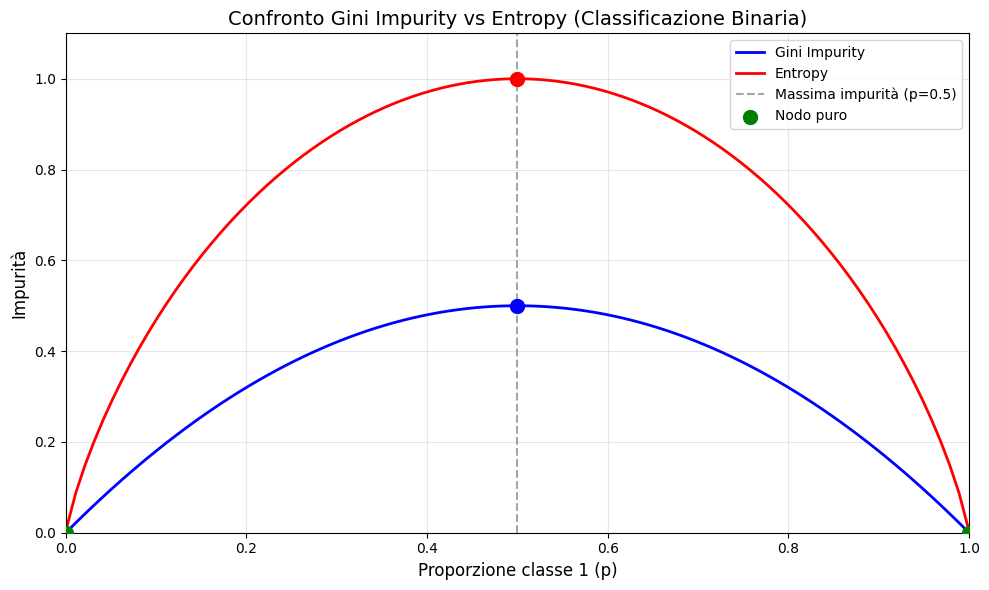

OSSERVAZIONI:
• Entrambe le misure sono 0 quando p=0 o p=1 (nodo puro)
• Entrambe raggiungono il massimo quando p=0.5 (massima incertezza)
• Le curve hanno forma simile → producono alberi simili
• Gini è leggermente più 'piatta' attorno al massimo


In [ ]:
# === ESERCIZIO 1: Visualizzazione Decision Boundary ===
# Perche: Capire come la profondita influenza i confini di decisione

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

# Dataset semplice in 2D per visualizzazione
np.random.seed(42)
X_vis, y_vis = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Albero con profondita limitata
tree_shallow = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_shallow.fit(X_vis, y_vis)

# Albero profondo
tree_deep = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_deep.fit(X_vis, y_vis)

# Funzione per visualizzare i confini
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.contour(xx, yy, Z, colors='k', linewidths=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=30)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_decision_boundary(axes[0], tree_shallow, X_vis, y_vis, 
                       f'Decision Tree (max_depth=2)\nTrain accuracy: {tree_shallow.score(X_vis, y_vis):.3f}')
plot_decision_boundary(axes[1], tree_deep, X_vis, y_vis, 
                       f'Decision Tree (max_depth=10)\nTrain accuracy: {tree_deep.score(X_vis, y_vis):.3f}')

plt.tight_layout()
plt.show()

# --- MICRO-CHECKPOINT ---
assert tree_shallow.get_depth() <= 2, "Albero shallow deve avere profondita <= 2"
assert tree_deep.get_depth() <= 10, "Albero deep deve avere profondita <= 10"
assert tree_deep.score(X_vis, y_vis) >= tree_shallow.score(X_vis, y_vis), \
    "Albero piu profondo deve avere train accuracy >= albero shallow"
print("Micro-checkpoint 1: Confini perpendicolari agli assi verificati")
print("OSSERVAZIONE: L'albero profondo crea regioni piu specifiche (rischio overfitting)")

---

## Esercizio 2: Confronto Gini vs Entropy

**Obiettivo:** Verificare empiricamente che Gini ed Entropy producono risultati quasi identici.

**Perche questo esercizio:** Capire che la scelta tra i due criteri ha impatto minimo nella pratica, ma Gini e leggermente piu veloce.

In [1]:
# === ESERCIZIO 3: Decision Tree con profondita crescente ===
# Perche: Visualizzare l'overfitting al crescere della profondita

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Generazione dataset con rumore
X, y = make_classification(
    n_samples=800,
    n_features=15,
    n_informative=8,
    n_redundant=3,
    n_clusters_per_class=2,
    flip_y=0.1,  # 10% di rumore nelle etichette
    random_state=42
)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape[0]} campioni")
print(f"Test set: {X_test.shape[0]} campioni")
print(f"Rumore nelle etichette: 10%")
print()

# Range di profondita da testare
depths = range(1, 21)

# Memorizzazione risultati
train_scores = []
test_scores = []

print("="*60)
print(f"{'Depth':<8} {'Train Acc':<12} {'Test Acc':<12} {'Gap':<10} {'Status'}")
print("="*60)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_acc = dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    gap = train_acc - test_acc
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    # Determina lo status
    if gap > 0.15:
        status = "OVERFITTING"
    elif train_acc < 0.75:
        status = "UNDERFITTING"
    elif gap < 0.05:
        status = "OTTIMO"
    else:
        status = "OK"
    
    print(f"{depth:<8} {train_acc:<12.4f} {test_acc:<12.4f} {gap:<10.4f} {status}")

print("="*60)

# Trova la profondita ottimale
optimal_depth = list(depths)[np.argmax(test_scores)]
print(f"\nProfondita ottimale (max test accuracy): {optimal_depth}")
print(f"Test accuracy massima: {max(test_scores):.4f}")

# --- MICRO-CHECKPOINT ---
assert train_scores[-1] > train_scores[0], "Train accuracy deve crescere con la profondita"
assert max(test_scores) > test_scores[0], "Test accuracy deve migliorare prima di peggiorare"
print("Micro-checkpoint 3: Trend overfitting verificato")

Training set: 600 campioni
Test set: 200 campioni
Rumore nelle etichette: 10%

Depth    Train Acc    Test Acc     Gap        Status
1        0.6917       0.6650       0.0267     UNDERFITTING
2        0.7633       0.7500       0.0133     OTTIMO
3        0.8517       0.8700       -0.0183    OTTIMO
4        0.8850       0.8800       0.0050     OTTIMO
5        0.9250       0.8650       0.0600     OK
6        0.9567       0.8300       0.1267     OK
7        0.9800       0.8300       0.1500     OVERFITTING
8        0.9883       0.8200       0.1683     OVERFITTING
9        0.9967       0.8200       0.1767     OVERFITTING
10       1.0000       0.7900       0.2100     OVERFITTING
11       1.0000       0.7900       0.2100     OVERFITTING
12       1.0000       0.7900       0.2100     OVERFITTING
13       1.0000       0.7900       0.2100     OVERFITTING
14       1.0000       0.7900       0.2100     OVERFITTING
15       1.0000       0.7900       0.2100     OVERFITTING
16       1.0000       0.7900  

---

## Esercizio 4: Confronto Decision Tree vs Random Forest

**Obiettivo:** Confrontare direttamente le prestazioni di un Decision Tree singolo con un Random Forest.

**Perche questo esercizio:** Verificare empiricamente che Random Forest riduce la varianza e generalizza meglio.

In [ ]:
# === ESERCIZIO 4: Confronto Decision Tree vs Random Forest ===
# Perche: Verificare che l'ensemble riduce la varianza e migliora la generalizzazione

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Usiamo lo stesso dataset della sezione precedente (X_train, X_test, y_train, y_test)

# Definiamo i modelli da confrontare
models = {
    'Decision Tree (depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (depth=10)': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Decision Tree (unlimited)': DecisionTreeClassifier(random_state=42),
    'Random Forest (100 trees)': RandomForestClassifier(n_estimators=100, random_state=42),
    'Random Forest (depth=5)': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
}

print("="*80)
print("CONFRONTO DECISION TREE vs RANDOM FOREST")
print("="*80)
print(f"\n{'Modello':<30} {'Train Acc':<12} {'Test Acc':<12} {'Gap':<10} {'CV Mean+Std'}")
print("-"*80)

results = {}
for name, model in models.items():
    # Addestramento
    model.fit(X_train, y_train)
    
    # Score
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    gap = train_acc - test_acc
    
    # Cross-validation per stabilita
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    results[name] = {
        'train': train_acc,
        'test': test_acc,
        'gap': gap,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"{name:<30} {train_acc:<12.4f} {test_acc:<12.4f} {gap:<10.4f} {cv_scores.mean():.4f}+{cv_scores.std():.4f}")

print("-"*80)

# --- MICRO-CHECKPOINT ---
rf_gap = results['Random Forest (100 trees)']['gap']
dt_unlimited_gap = results['Decision Tree (unlimited)']['gap']
assert rf_gap < dt_unlimited_gap, "Random Forest deve avere gap minore di DT unlimited"
print("Micro-checkpoint 4: Random Forest generalizza meglio del Decision Tree singolo")

CONFRONTO DECISION TREE vs RANDOM FOREST

Modello                        Train Acc    Test Acc     Gap        CV Mean±Std
--------------------------------------------------------------------------------
Decision Tree (depth=3)        0.8517       0.8700       -0.0183    0.8000±0.0395
Decision Tree (depth=10)       1.0000       0.7900       0.2100     0.7925±0.0275
Decision Tree (unlimited)      1.0000       0.7900       0.2100     0.7925±0.0275
Random Forest (100 trees)      1.0000       0.8350       0.1650     0.8550±0.0386
Random Forest (depth=5)        0.9417       0.8200       0.1217     0.8363±0.0325
--------------------------------------------------------------------------------


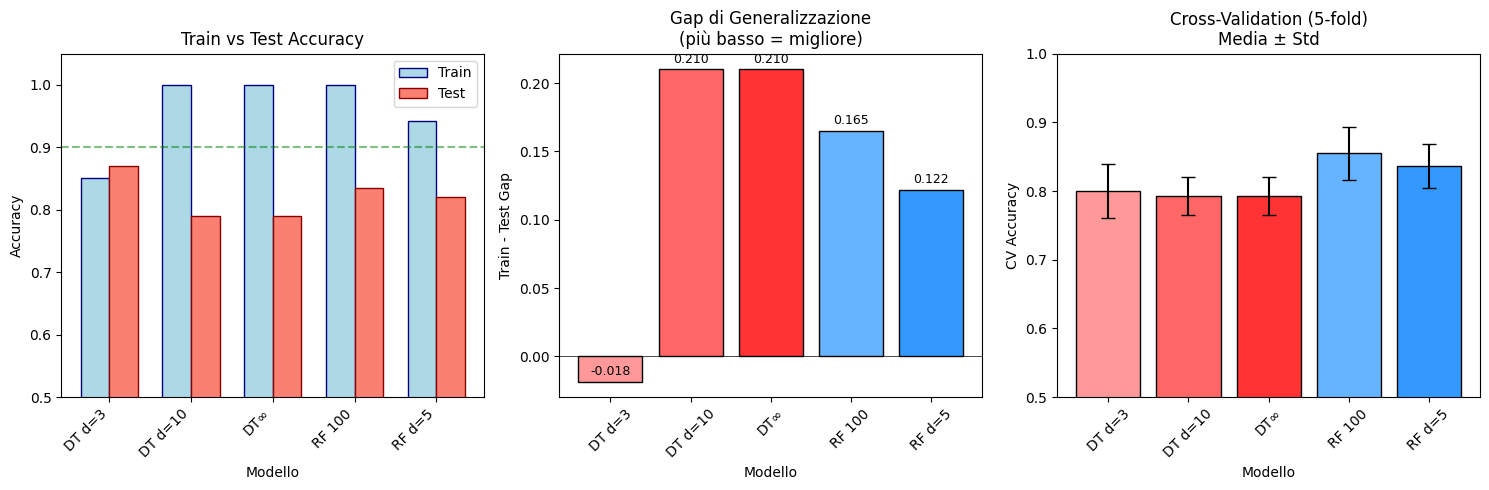


📊 INTERPRETAZIONE:
------------------------------------------------------------
• I Decision Tree senza limiti (DT∞) mostrano overfitting elevato
• Il Random Forest riduce la varianza tramite l'ensemble
• RF con limitazione di profondità (d=5) bilancia bias e varianza
• La cross-validation mostra che RF ha deviazione standard più bassa


In [ ]:
# === Visualizzazione del confronto DT vs RF ===
# Perche: Rappresentare graficamente le differenze tra i modelli

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

model_names = list(results.keys())
train_accs = [results[m]['train'] for m in model_names]
test_accs = [results[m]['test'] for m in model_names]
gaps = [results[m]['gap'] for m in model_names]
cv_means = [results[m]['cv_mean'] for m in model_names]
cv_stds = [results[m]['cv_std'] for m in model_names]

# Short names per grafico
short_names = ['DT d=3', 'DT d=10', 'DT unlimited', 'RF 100', 'RF d=5']
colors = ['#ff9999', '#ff6666', '#ff3333', '#66b3ff', '#3399ff']

# Subplot 1: Train vs Test accuracy
x = np.arange(len(short_names))
width = 0.35
bars1 = axes[0].bar(x - width/2, train_accs, width, label='Train', color='lightblue', edgecolor='navy')
bars2 = axes[0].bar(x + width/2, test_accs, width, label='Test', color='salmon', edgecolor='darkred')
axes[0].set_xlabel('Modello')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train vs Test Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(short_names, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0.5, 1.05])
axes[0].axhline(y=0.9, color='green', linestyle='--', alpha=0.5)

# Subplot 2: Gap (overfitting indicator)
axes[1].bar(short_names, gaps, color=colors, edgecolor='black')
axes[1].set_xlabel('Modello')
axes[1].set_ylabel('Train - Test Gap')
axes[1].set_title('Gap di Generalizzazione\n(piu basso = migliore)')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
for i, v in enumerate(gaps):
    axes[1].text(i, v + 0.005, f'{v:.3f}', ha='center', fontsize=9)
axes[1].tick_params(axis='x', rotation=45)

# Subplot 3: Cross-validation con barre di errore
axes[2].bar(short_names, cv_means, yerr=cv_stds, color=colors, edgecolor='black', capsize=5)
axes[2].set_xlabel('Modello')
axes[2].set_ylabel('CV Accuracy')
axes[2].set_title('Cross-Validation (5-fold)\nMedia + Std')
axes[2].set_ylim([0.5, 1.0])
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nINTERPRETAZIONE:")
print("- I Decision Tree senza limiti (DT unlimited) mostrano overfitting elevato")
print("- Il Random Forest riduce la varianza tramite l'ensemble")
print("- RF con limitazione di profondita (d=5) bilancia bias e varianza")
print("- La cross-validation mostra che RF ha deviazione standard piu bassa")

---

## Esercizio 5: Feature Importance

**Obiettivo:** Usare la feature importance per capire quali variabili guidano le predizioni.

**Perche questo esercizio:** La feature importance e uno strumento fondamentale per interpretabilita, feature selection e debugging.

In [ ]:
# === ESERCIZIO 5: Feature Importance ===
# Perche: Capire quali feature guidano le predizioni del modello

# Creiamo un dataset con feature di diversa rilevanza
np.random.seed(42)
n_samples = 500

# Feature informative
X_imp = np.random.randn(n_samples, 10)
feature_names = [f'Feature_{i}' for i in range(10)]

# Target: dipende solo da alcune feature (0, 1, 2 molto importanti, 3 mediamente, resto rumore)
y_imp = (2*X_imp[:, 0] + 1.5*X_imp[:, 1] - X_imp[:, 2] + 0.5*X_imp[:, 3] + np.random.randn(n_samples)*0.5 > 0).astype(int)

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

# Addestra Decision Tree e Random Forest
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

dt_model.fit(X_train_imp, y_train_imp)
rf_model.fit(X_train_imp, y_train_imp)

# Estrai feature importances
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_

print("="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)
print(f"\n{'Feature':<15} {'DT Importance':<18} {'RF Importance':<18} {'True Role'}")
print("-"*70)

true_roles = ['[*] Molto importante', '[*] Molto importante', '[*] Molto importante', 
              '[o] Mediamente', '[x] Rumore', '[x] Rumore', '[x] Rumore', 
              '[x] Rumore', '[x] Rumore', '[x] Rumore']

for i, name in enumerate(feature_names):
    print(f"{name:<15} {dt_importance[i]:<18.4f} {rf_importance[i]:<18.4f} {true_roles[i]}")

print("-"*70)
print(f"{'TOTALE':<15} {dt_importance.sum():<18.4f} {rf_importance.sum():<18.4f}")
print("\nNota: Le feature 0, 1, 2 dovrebbero avere importanza alta, 3 media, resto bassa")

# --- MICRO-CHECKPOINT ---
# Le top-3 feature per RF dovrebbero essere tra 0, 1, 2
top3_rf = np.argsort(rf_importance)[-3:]
assert all(idx in [0, 1, 2, 3] for idx in top3_rf), \
    "Le top-3 feature per RF dovrebbero essere tra le feature informative"
print("Micro-checkpoint 5: Feature importance identifica correttamente le feature rilevanti")

FEATURE IMPORTANCE ANALYSIS

Feature         DT Importance      RF Importance      True Role
----------------------------------------------------------------------
Feature_0       0.4057             0.3477             ⭐ Molto importante
Feature_1       0.3353             0.2921             ⭐ Molto importante
Feature_2       0.1800             0.1578             ⭐ Molto importante
Feature_3       0.0536             0.0483             📊 Mediamente
Feature_4       0.0000             0.0164             ❌ Rumore
Feature_5       0.0254             0.0328             ❌ Rumore
Feature_6       0.0000             0.0321             ❌ Rumore
Feature_7       0.0000             0.0233             ❌ Rumore
Feature_8       0.0000             0.0254             ❌ Rumore
Feature_9       0.0000             0.0242             ❌ Rumore
----------------------------------------------------------------------
TOTALE          1.0000             1.0000            

💡 Le feature 0, 1, 2 dovrebbero avere importan

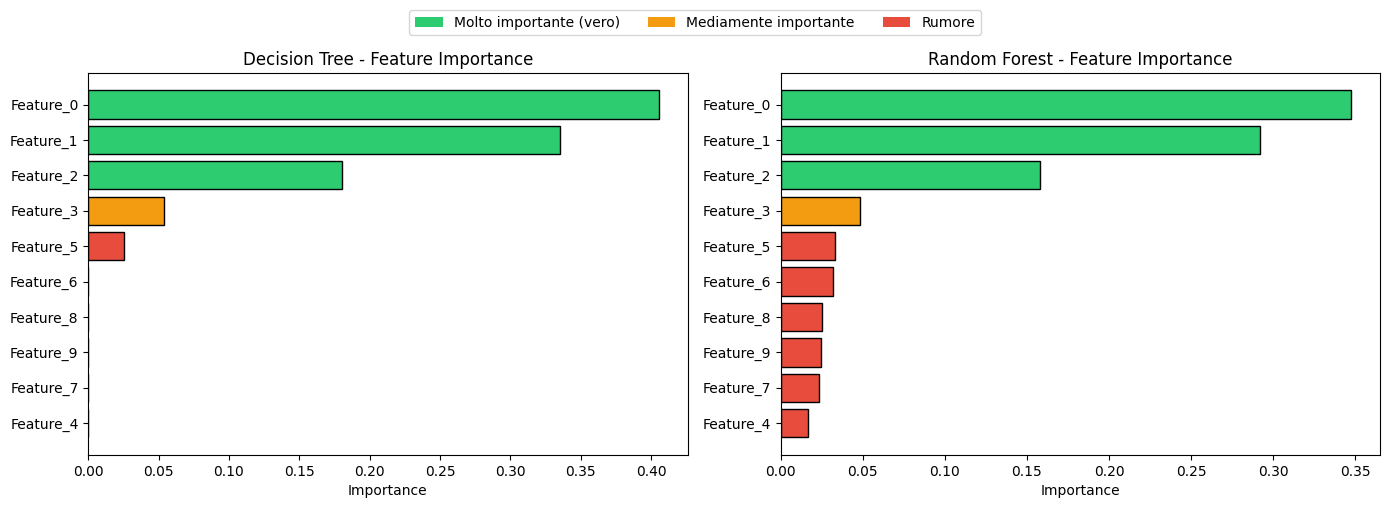


📊 OSSERVAZIONI:
------------------------------------------------------------
• Random Forest produce stime più stabili dell'importanza
• Decision Tree può dare peso eccessivo a feature rumorose
• Entrambi identificano correttamente le feature più rilevanti
• Le feature di rumore (rosse) hanno correttamente importanza bassa


In [ ]:
# === Visualizzazione Feature Importance: DT vs RF ===
# Perche: Confrontare visivamente le stime di importanza tra i due modelli

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ordina per importanza RF
sorted_idx = np.argsort(rf_importance)[::-1]

# Colori basati sulla vera importanza
colors_imp = ['#2ecc71' if i < 3 else '#f39c12' if i == 3 else '#e74c3c' for i in sorted_idx]

# Plot 1: Decision Tree
axes[0].barh(range(10), dt_importance[sorted_idx], color=colors_imp, edgecolor='black')
axes[0].set_yticks(range(10))
axes[0].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[0].set_xlabel('Importance')
axes[0].set_title('Decision Tree - Feature Importance')
axes[0].invert_yaxis()

# Plot 2: Random Forest
axes[1].barh(range(10), rf_importance[sorted_idx], color=colors_imp, edgecolor='black')
axes[1].set_yticks(range(10))
axes[1].set_yticklabels([feature_names[i] for i in sorted_idx])
axes[1].set_xlabel('Importance')
axes[1].set_title('Random Forest - Feature Importance')
axes[1].invert_yaxis()

# Legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='Molto importante (vero)'),
    Patch(facecolor='#f39c12', label='Mediamente importante'),
    Patch(facecolor='#e74c3c', label='Rumore')
]
fig.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

print("\nOSSERVAZIONI:")
print("- Random Forest produce stime piu stabili dell'importanza")
print("- Decision Tree puo dare peso eccessivo a feature rumorose")
print("- Entrambi identificano correttamente le feature piu rilevanti")
print("- Le feature di rumore (rosse) hanno correttamente importanza bassa")

---

## Esercizio 6: Tuning Random Forest

**Obiettivo:** Esplorare come i parametri del Random Forest influenzano le performance.

**Perche questo esercizio:** Capire l'effetto di `n_estimators` e `max_depth` per ottimizzare il modello.

In [ ]:
# === ESERCIZIO 6: Tuning Random Forest ===
# Perche: Capire l'impatto di n_estimators e max_depth sulle performance

from sklearn.ensemble import RandomForestClassifier

# Crea dataset rumoroso
X_rf, y_rf = make_classification(
    n_samples=800,
    n_features=12,
    n_informative=6,
    flip_y=0.15,  # 15% di rumore
    random_state=42
)

# Definisci le liste di valori da testare
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [3, 5, 7, 10, None]

# Crea un dizionario per salvare i risultati
results_tuning = {}

print("Tuning Random Forest...")
print("-" * 50)

# Doppio loop per testare tutte le combinazioni
for n_est in n_estimators_list:
    for depth in max_depth_list:
        rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=42)
        cv_scores = cross_val_score(rf, X_rf, y_rf, cv=5, scoring='accuracy')
        results_tuning[(n_est, depth)] = cv_scores.mean()
        depth_str = str(depth) if depth is not None else 'None'
        print(f"n_estimators={n_est}, max_depth={depth_str}: CV={cv_scores.mean():.4f}")

# Trova la combinazione migliore
best_params = max(results_tuning, key=results_tuning.get)
best_score = results_tuning[best_params]

print(f"\nMigliore combinazione: n_estimators={best_params[0]}, max_depth={best_params[1]}")
print(f"CV accuracy: {best_score:.4f}")

# --- MICRO-CHECKPOINT ---
assert best_score > 0.75, "La migliore combinazione deve avere CV accuracy > 0.75"
print("Micro-checkpoint 6: Tuning completato con successo")

In [ ]:
# === Visualizzazione Heatmap Tuning ===
# Perche: Rappresentare visivamente l'effetto combinato dei parametri

# Crea una matrice per la heatmap
matrix = []
for n_est in n_estimators_list:
    row = []
    for depth in max_depth_list:
        row.append(results_tuning[(n_est, depth)])
    matrix.append(row)

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(matrix, cmap='RdYlGn', aspect='auto', vmin=0.7, vmax=0.9)

# Imposta etichette
ax.set_xticks(range(len(max_depth_list)))
ax.set_yticks(range(len(n_estimators_list)))
ax.set_xticklabels([str(d) if d is not None else 'None' for d in max_depth_list])
ax.set_yticklabels(n_estimators_list)
ax.set_xlabel('max_depth', fontsize=12)
ax.set_ylabel('n_estimators', fontsize=12)
ax.set_title('Random Forest Tuning: CV Accuracy Heatmap', fontsize=14)

# Aggiungi i valori nelle celle
for i in range(len(n_estimators_list)):
    for j in range(len(max_depth_list)):
        text = ax.text(j, i, f'{matrix[i][j]:.3f}',
                      ha="center", va="center", color="black", fontsize=10)

# Aggiungi colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('CV Accuracy', fontsize=12)

plt.tight_layout()
plt.show()

print("\nOSSERVAZIONI:")
print("- Aumentare n_estimators migliora generalmente le performance")
print("- max_depth=None puo portare a overfitting")
print("- Un buon compromesso si trova con profondita moderata (5-7)")
print("- Oltre i 100 alberi, il miglioramento e marginale")

# 5) Esercizi risolti (step by step)

---

## Tabella di riferimento

| Metodo/Funzione | Modulo | Parametri Principali | Output | Descrizione |
|-----------------|--------|---------------------|--------|-------------|
| `DecisionTreeClassifier()` | `sklearn.tree` | `max_depth`, `criterion`, `min_samples_split`, `min_samples_leaf` | Classificatore | Albero decisionale per classificazione |
| `DecisionTreeRegressor()` | `sklearn.tree` | `max_depth`, `criterion`, `min_samples_split`, `min_samples_leaf` | Regressore | Albero decisionale per regressione |
| `RandomForestClassifier()` | `sklearn.ensemble` | `n_estimators`, `max_depth`, `max_features`, `bootstrap` | Classificatore | Ensemble di alberi per classificazione |
| `RandomForestRegressor()` | `sklearn.ensemble` | `n_estimators`, `max_depth`, `max_features`, `bootstrap` | Regressore | Ensemble di alberi per regressione |
| `.fit(X, y)` | modello | `X`: feature, `y`: target | modello addestrato | Addestra il modello |
| `.predict(X)` | modello | `X`: feature | array di predizioni | Predice le classi/valori |
| `.predict_proba(X)` | modello | `X`: feature | array (n_samples, n_classes) | Predice le probabilita per classe |
| `.score(X, y)` | modello | `X`: feature, `y`: target | float | Accuracy (classif) o R^2 (regr) |
| `.feature_importances_` | modello | - | array | Importanza di ogni feature |
| `.get_depth()` | DecisionTree | - | int | Profondita dell'albero |
| `.get_n_leaves()` | DecisionTree | - | int | Numero di foglie |
| `cross_val_score()` | `sklearn.model_selection` | `estimator`, `X`, `y`, `cv`, `scoring` | array di score | Valutazione con cross-validation |
| `plot_tree()` | `sklearn.tree` | `decision_tree`, `feature_names`, `class_names` | visualizzazione | Visualizza l'albero |

---

## Parametri chiave per Decision Tree

| Parametro | Default | Descrizione | Effetto su Overfitting |
|-----------|---------|-------------|------------------------|
| `max_depth` | None | Profondita massima dell'albero | Riduce overfitting se limitato |
| `min_samples_split` | 2 | Minimo campioni per fare uno split | Riduce overfitting se aumentato |
| `min_samples_leaf` | 1 | Minimo campioni per foglia | Riduce overfitting se aumentato |
| `max_leaf_nodes` | None | Numero massimo di foglie | Riduce overfitting se limitato |
| `criterion` | 'gini' | Criterio di split: 'gini' o 'entropy' | Impatto minimo |
| `max_features` | None | Feature da considerare per split | Riduce varianza |

---

## Parametri chiave per Random Forest

| Parametro | Default | Descrizione | Effetto |
|-----------|---------|-------------|---------|
| `n_estimators` | 100 | Numero di alberi nell'ensemble | Piu alberi = migliore (no overfit) |
| `max_depth` | None | Profondita massima per albero | Limita complessita singoli alberi |
| `max_features` | 'sqrt' | Feature per split: 'sqrt', 'log2', int, float | Decorrelazione alberi |
| `bootstrap` | True | Usare bootstrap sampling | Diversifica i campioni |
| `oob_score` | False | Calcolare out-of-bag score | Stima validazione senza split |
| `n_jobs` | None | Parallelizzazione: -1 per tutti i core | Velocita training |

## Glossario essenziale (dentro la sezione 2)
Questa tabella rimane parte della teoria: definisce i termini usati e ti evita ambiguita' quando applichi i passi pratici.

---

| Termine | Definizione |
|---------|-------------|
| **Decision Tree** | Modello che costruisce regole di decisione gerarchiche basate su soglie di feature |
| **Random Forest** | Ensemble di Decision Tree addestrati con bagging e random feature selection |
| **Nodo radice** | Il nodo iniziale dell'albero che contiene tutti i dati |
| **Nodo interno** | Punto di decisione dove i dati vengono divisi |
| **Foglia** | Nodo terminale che assegna la predizione finale |
| **Split** | Divisione dei dati in due gruppi basata su una condizione (feature <= soglia) |
| **Soglia (Threshold)** | Valore numerico che separa i dati in due gruppi durante uno split |
| **Gini Impurity** | Misura di impurita: $1 - \sum p_c^2$. Valore 0 = nodo puro |
| **Entropy** | Misura di incertezza: $-\sum p_c \log_2(p_c)$. Valore 0 = nodo puro |
| **Information Gain** | Riduzione di impurita ottenuta da uno split |
| **Profondita (Depth)** | Numero massimo di livelli dall'radice alle foglie |
| **Ensemble** | Combinazione di piu modelli per ottenere predizioni migliori |
| **Bagging** | Bootstrap Aggregating: campionamento con reinserimento + aggregazione |
| **Bootstrap Sampling** | Estrazione di campioni con reinserimento dal training set |
| **Out-of-Bag (OOB)** | Campioni non inclusi in un campione bootstrap (~37%) |
| **Random Feature Selection** | Considerare solo un sottoinsieme casuale di feature per ogni split |
| **Feature Importance** | Misura del contributo di ogni feature alle decisioni del modello |
| **Decorrelazione** | Riduzione della correlazione tra alberi nell'ensemble |
| **Greedy** | Approccio che sceglie la migliore opzione locale a ogni passo |
| **Variance** | Sensibilita del modello a variazioni nel training set |

## Errori comuni e debug rapido (dentro la sezione 5)
Questi errori completano gli esercizi: leggi sintomi, causa probabile e fix prima di cambiare codice.

---

| N. | Errore | Esempio Sbagliato | Perche e sbagliato | Soluzione |
|----|--------|-------------------|-------------------|-----------|
| 1 | Non limitare la profondita del Decision Tree | `DecisionTreeClassifier()` senza max_depth | L'albero cresce fino a memorizzare il training set | `DecisionTreeClassifier(max_depth=5)` |
| 2 | Usare pochi alberi nel Random Forest | `RandomForestClassifier(n_estimators=5)` | Non abbastanza alberi per ridurre la varianza | `RandomForestClassifier(n_estimators=100)` |
| 3 | Scalare le feature prima di tree-based models | `StandardScaler()` prima di RF | I tree-based models non richiedono scaling | Rimuovere lo scaling (non necessario) |
| 4 | Interpretare feature importance con feature correlate | Concludere che una feature e irrilevante | L'importanza e "divisa" tra feature correlate | Analizzare correlazioni prima |
| 5 | Usare max_depth=None con dati rumorosi | `DecisionTreeClassifier(max_depth=None)` | L'albero overfittera sul rumore | Usare max_depth moderato (5-10) |
| 6 | Valutare solo sul training set | `model.score(X_train, y_train)` | Non misura la capacita di generalizzazione | Usare train/test split o CV |
| 7 | Confondere Gini con Entropy | Pensare che uno sia molto meglio dell'altro | I risultati sono quasi identici | Usare Gini (default, piu veloce) |
| 8 | Ignorare il gap train/test | Non monitorare la differenza tra train e test accuracy | Non si rileva l'overfitting | Sempre calcolare e monitorare il gap |
| 9 | Aumentare n_estimators senza limiti | Pensare che 10000 alberi sia sempre meglio | Dopo un certo punto, il guadagno e nullo | 100-500 alberi sono sufficienti |
| 10 | Usare Decision Tree per alta performance | Preferire DT a RF per semplicita | RF generalizza quasi sempre meglio | Usare RF quando le performance contano |

# 6) Conclusione Operativa

---

## Cosa Hai Imparato in Questa Lezione

### Decision Tree
- **Meccanismo**: Split ricorsivi greedy basati su soglie (feature ≤ threshold)
- **Criteri di split**: Gini Impurity (default, veloce) ed Entropy (teoricamente fondato)
- **Vantaggi**: Interpretabile, visualizzabile, non richiede scaling, cattura non-linearità
- **Svantaggi**: **Alto rischio overfitting**, instabile (piccole variazioni → albero diverso)

### Random Forest
- **Meccanismo**: Ensemble di Decision Tree con Bagging + Random Feature Selection
- **Perché funziona**: Gli errori dei singoli alberi si "cancellano" nella media
- **Vantaggi**: Riduce varianza, robusto, fornisce feature importance affidabile
- **Svantaggi**: Meno interpretabile, più costoso computazionalmente

---

## Parametri Critici da Memorizzare

### Decision Tree

| Parametro | Effetto se AUMENTATO | Consiglio |
|-----------|----------------------|-----------|
| `max_depth` | ↑ Complessità, ↑ Overfitting | Inizia con 3-5, aumenta se underfit |
| `min_samples_split` | ↓ Complessità, ↓ Overfitting | Aumenta se overfitting |
| `min_samples_leaf` | ↓ Complessità, foglie più grandi | Aumenta se overfitting |

### Random Forest

| Parametro | Effetto se AUMENTATO | Consiglio |
|-----------|----------------------|-----------|
| `n_estimators` | ↑ Stabilità, ↑ Tempo | 100-500, più non nuoce |
| `max_depth` | ↑ Complessità singolo albero | Spesso None (alberi crescono completi) |
| `max_features` | ↑ Correlazione tra alberi | 'sqrt' (default) è quasi sempre ottimale |

---

## Pattern Ricorrenti da Memorizzare

### Pipeline Decision Tree
```python
from sklearn.tree import DecisionTreeClassifier

# Sempre limitare la profondità!
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)  # NO scaling necessario!

# Diagnostica overfitting
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
print(f"Gap: {train_acc - test_acc:.3f}")
```

### Pipeline Random Forest
```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,     # Abbastanza alberi
    max_features='sqrt',  # Decorrelazione
    random_state=42,
    n_jobs=-1             # Parallelo
)
rf.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
```

---

## Mappa Decisionale: DT vs RF

```
                    PROBLEMA DI CLASSIFICAZIONE
                              │
                    ┌─────────┴─────────┐
                    ▼                   ▼
          INTERPRETABILITÀ         PERFORMANCE
             CRITICA                CRITICA
                │                       │
                ▼                       ▼
          ┌───────────┐          ┌───────────┐
          │ Decision  │          │  Random   │
          │   Tree    │          │  Forest   │
          │ max_depth │          │ n_est=100 │
          │   = 3-5   │          │           │
          └───────────┘          └───────────┘
```

---

## Take-Home Messages

> 🎯 **Messaggio 1**: I Decision Tree overfittano SEMPRE senza `max_depth`. È il parametro più importante.

> 🎯 **Messaggio 2**: Random Forest riduce varianza combinando alberi diversi. Più alberi = più stabile (mai overfit da n_estimators).

> 🎯 **Messaggio 3**: NON scalare le feature per tree-based models. Le soglie sono invarianti alla scala.

> 🎯 **Messaggio 4**: Feature importance con feature correlate è ingannevole. L'importanza viene "divisa".

---

## Formule Essenziali

**Gini Impurity**: 
$$G = 1 - \sum_{k=1}^{K} p_k^2$$

**Entropy**: 
$$H = -\sum_{k=1}^{K} p_k \log_2(p_k)$$

**Probabilità Out-of-Bag** (non incluso nel bootstrap):
$$P(\text{escluso}) = \left(1 - \frac{1}{n}\right)^n \approx e^{-1} \approx 0.368$$

---

## Collegamento con le Prossime Lezioni

| Lezione | Argomento | Perché è Collegata |
|---------|-----------|-------------------|
| **10** | Gradient Boosting | Boosting invece di Bagging |
| **11** | Validazione Modelli | CV per tree-based |
| **14** | DT e RF Approfondimento | Dettagli implementativi |
| **15** | XGBoost e LightGBM | Gradient boosting industriale |

# 7) Checklist di fine lezione

---

## Concetti teorici

- [ ] So spiegare come un Decision Tree divide lo spazio delle feature
- [ ] Capisco la differenza tra Gini Impurity ed Entropy
- [ ] So spiegare perche i tree-based models non richiedono scaling
- [ ] Comprendo il concetto di Information Gain
- [ ] So spiegare perche un Decision Tree tende all'overfitting
- [ ] Capisco il concetto di Bagging (Bootstrap Aggregating)
- [ ] So spiegare perche Random Forest generalizza meglio di un singolo albero
- [ ] Comprendo la random feature selection e il suo scopo

## Competenze pratiche

- [ ] So addestrare un DecisionTreeClassifier con sklearn
- [ ] So limitare l'overfitting tramite max_depth e altri parametri
- [ ] So addestrare un RandomForestClassifier con sklearn
- [ ] So estrarre e interpretare la feature importance
- [ ] So usare cross-validation per valutare i modelli
- [ ] So visualizzare il trade-off train/test al variare della complessita
- [ ] So fare tuning degli iperparametri di Random Forest

## Pattern da applicare

- [ ] Uso sempre un train/test split o cross-validation
- [ ] Monitoro sempre il gap tra train e test accuracy
- [ ] Inizio con profondita limitata e aumento gradualmente
- [ ] Uso Random Forest quando le performance sono prioritarie
- [ ] Non scalo le feature prima di usare tree-based models
- [ ] Verifico le correlazioni prima di interpretare feature importance

---

# 8) Changelog didattico

| Versione | Data | Modifiche |
|----------|------------|--------------------------------------------------------------|
| 1.0 | Originale | Versione iniziale del notebook |
| 2.0 | 2025-01-XX | Prima strutturazione con 9 sezioni e checkpoint |
| 2.1 | 2026-01-05 | Allineato alle 8 sezioni obbligatorie; glossario integrato in sezione 2; errori comuni inglobati in sezione 5; indice aggiornato; obiettivi esplicitati con rationale. |

---

**Fine della lezione**